In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#GH_Data_1_2_pre1에서 가공한 자료 불러오기
app_store_df = pd.read_csv("./app_store_modified_2.csv")
app_store_df = app_store_df.drop(['Unnamed: 0'], axis=1)
app_store_drop_nan = pd.read_csv("./app_store_modified_3.csv")      #std_Rating의 상관계수 검정을 위해 nan값이 포함된 열 제거하여 저장

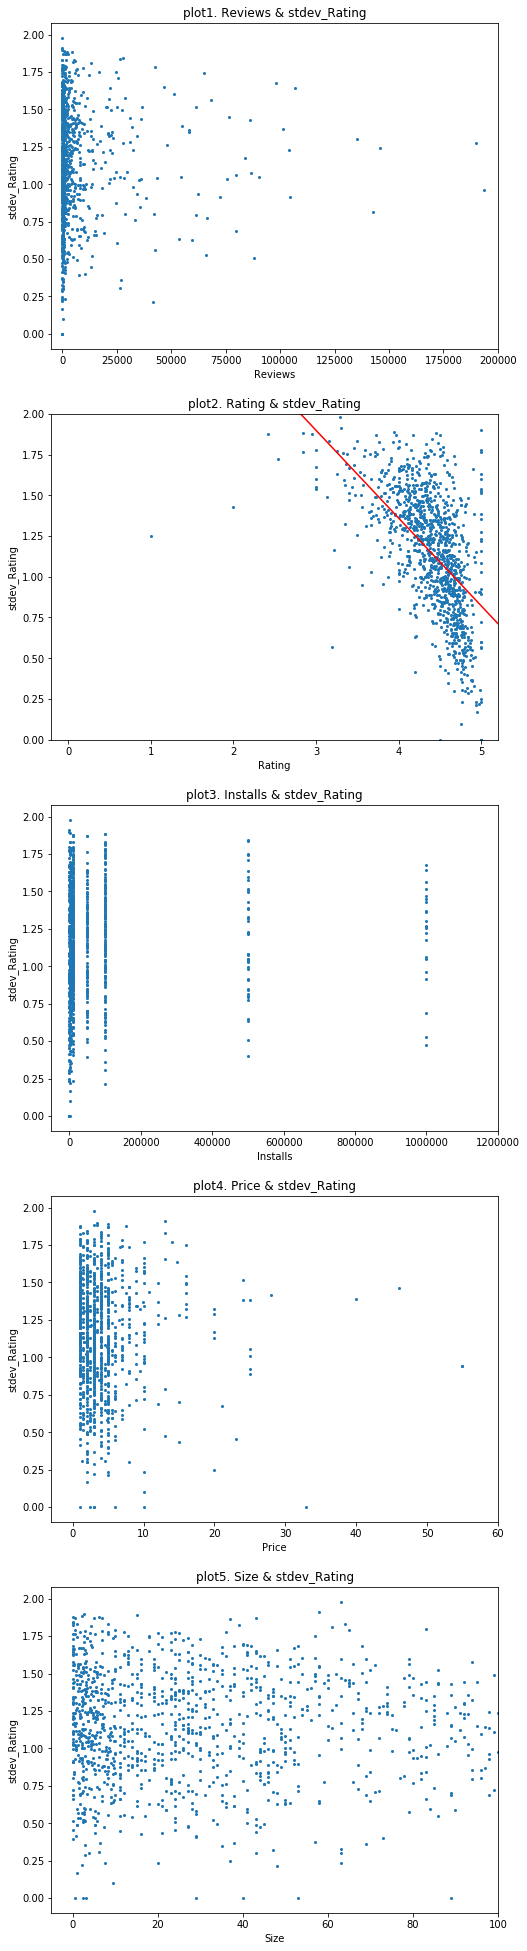

In [2]:
#산점도 그리기
from sklearn.linear_model import LinearRegression
plt.figure(figsize = (8,30))
plt.subplots_adjust(top=1)
columns = ['Reviews', 'Rating','Installs', 'NPriceD', 'NSizeM']
ylabels = ['Reviews', 'Rating','Installs', 'Price', 'Size']
reg1 = LinearRegression().fit(X = app_store_drop_nan['Rating'].values.reshape(-1,1), y = app_store_drop_nan.stds_rating)


for i in list(range(5)):        #각 열에 대해 산점도 그리기
    plt.subplot(5,1,i+1)
    plt.title('plot'+str(i+1)+'. '+ylabels[i]+' & stdev_Rating')
    plt.ylabel('stdev_Rating')
    plt.xlabel(ylabels[i])
    if i == 0:
        plt.xlim(-5000,200000)
    elif i == 1:
        plt.ylim(0,2)
        plt.xlim(-0.2,5.2)
    elif i ==2:
        plt.xlim(-50000, 1200000)
    elif i == 3:
        plt.xlim(-3,60)
    elif i == 4:
        plt.xlim(-5,100)
    plt.plot( app_store_df[columns[i]],app_store_df.stds_rating,'o',markersize=2)
    if i == 1:                  #Rating 선형회귀 그래프 그리기
        plt.plot([0,5.2],reg1.predict([[0],[5.2]]),color = 'r')


In [3]:
app_store_df.corr() #상관계수 확인

,Rating,Reviews,Installs,NPriceD,NSizeM,stds_rating
Rating,1.000000,0.063371,0.034199,-0.046440,0.036232,-0.569091
Reviews,0.063371,1.000000,0.762809,-0.022131,0.103418,0.001712
Installs,0.034199,0.762809,1.000000,-0.025529,0.069032,0.025959
NPriceD,-0.046440,-0.022131,-0.025529,1.000000,-0.014973,0.047923
NSizeM,0.036232,0.103418,0.069032,-0.014973,1.000000,-0.043315
stds_rating,-0.569091,0.001712,0.025959,0.047923,-0.043315,1.000000
